In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx")
data

,Player,Nation,Pos,Squad,Age,Tkl,TklW,Blocks,Sh,Pass,Err,MP,Gls,Ast,CrdY,CrdR,short Cmp%,medium Cmp%,long Cmp%,KP,Fls,Crs,OG,AerWon,AerLost,CrdY + CrdR,AerTot
0,James Abankwah,ie IRL,DF,Udinese,18,1,1,4,2,2,0,2,0,0,0,0,93.3,75.0,40.0,0,2,0,0,2,0,0,2
1,Francesco Acerbi,it ITA,DF,Inter,34,33,19,25,18,7,2,31,0,2,4,0,91.8,91.9,73.8,16,17,22,0,78,42,4,120
2,Ola Aina,ng NGA,DF,Torino,25,17,13,12,2,10,0,19,1,1,5,0,90.5,75.1,51.6,12,16,35,0,12,10,5,22
3,Emanuel Aiwum,at AUT,DF,Cremonese,21,55,34,28,16,12,3,23,0,0,3,0,89.5,84.2,41.2,4,21,4,0,28,17,3,45
4,Kelvin Amian,fr FRA,DF,Spezia,24,54,32,34,12,22,1,30,0,1,7,1,86.1,77.3,45.0,18,37,39,0,34,35,8,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Davide Zappacosta,it ITA,DF,Atalanta,30,34,18,23,2,21,0,21,4,2,4,0,93.5,80.9,54.2,15,18,59,0,2,8,4,10
205,Deyovaisio Zeefuik,nl NED,DF,Hellas Verona,24,1,1,0,0,0,0,1,0,0,0,0,100.0,100.0,0.0,0,0,1,0,0,0,0,0
206,Marvin Zeegelaar,nl NED,DF,Udinese,31,8,4,2,0,2,0,7,1,0,3,1,85.1,89.3,50.0,4,13,4,0,8,2,4,10
207,David Zima,cz CZE,DF,Torino,21,9,5,7,2,5,2,9,0,0,0,0,77.9,84.9,60.0,2,4,0,0,15,9,0,24


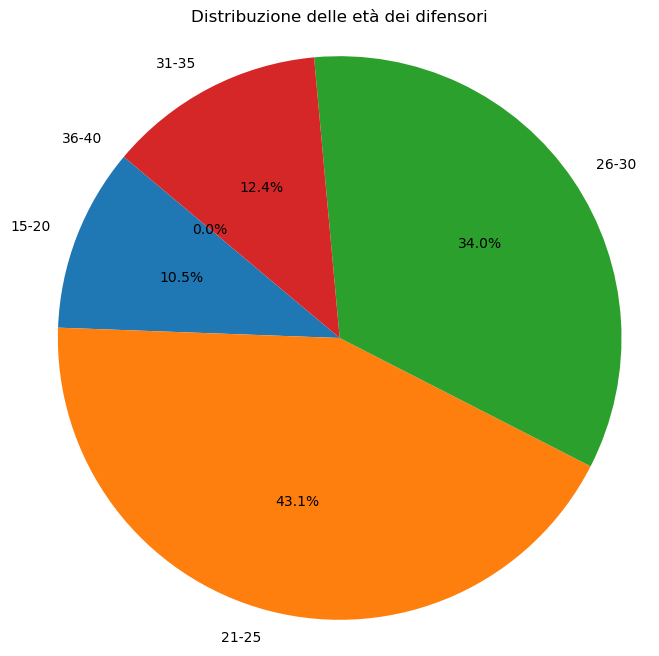

In [2]:
#diagramma a torta


eta = data['Age']

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Categorizza le età nelle fasce specificate
eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

# Conta il numero di difensori in ciascuna fascia
eta_counts = eta_bins.value_counts().sort_index()

# Crea il diagramma a torta
plt.figure(figsize=(8, 8))
plt.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle età dei difensori')
plt.axis('equal')  # Per rendere il diagramma a torta circolare



# Aggiungi la legenda
#ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())], title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostra il diagramma a torta
plt.show()


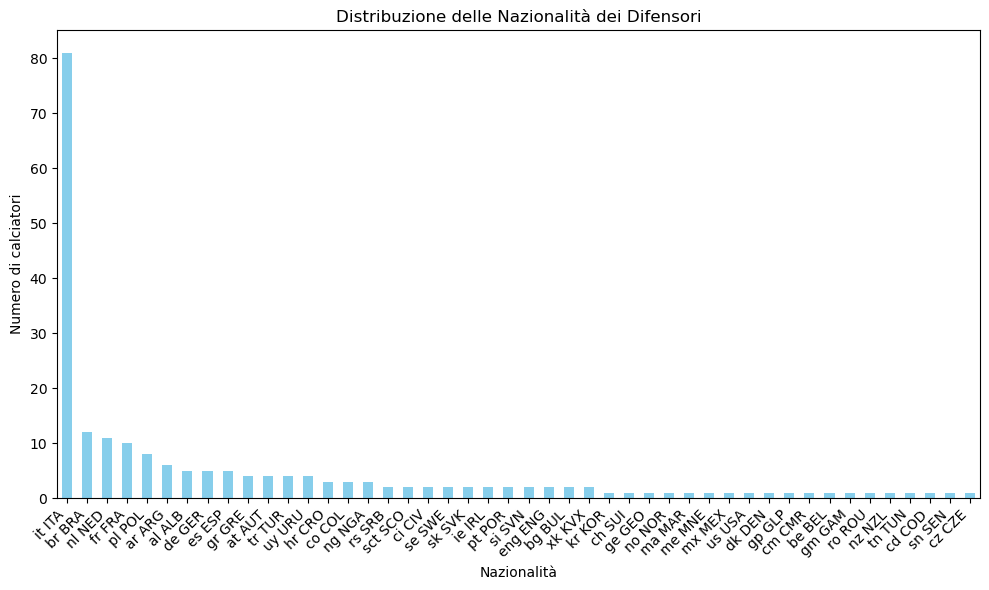

In [3]:
#istogramma nazionalità
nazionalita = data['Nation']

# Conta il numero di calciatori per ciascuna nazionalità
nazionalita_counts = nazionalita.value_counts()

# Crea l'istogramma
fig, ax = plt.subplots(figsize=(10, 6))
nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

# Aggiungi i titoli e le etichette
ax.set_title('Distribuzione delle Nazionalità dei Difensori')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

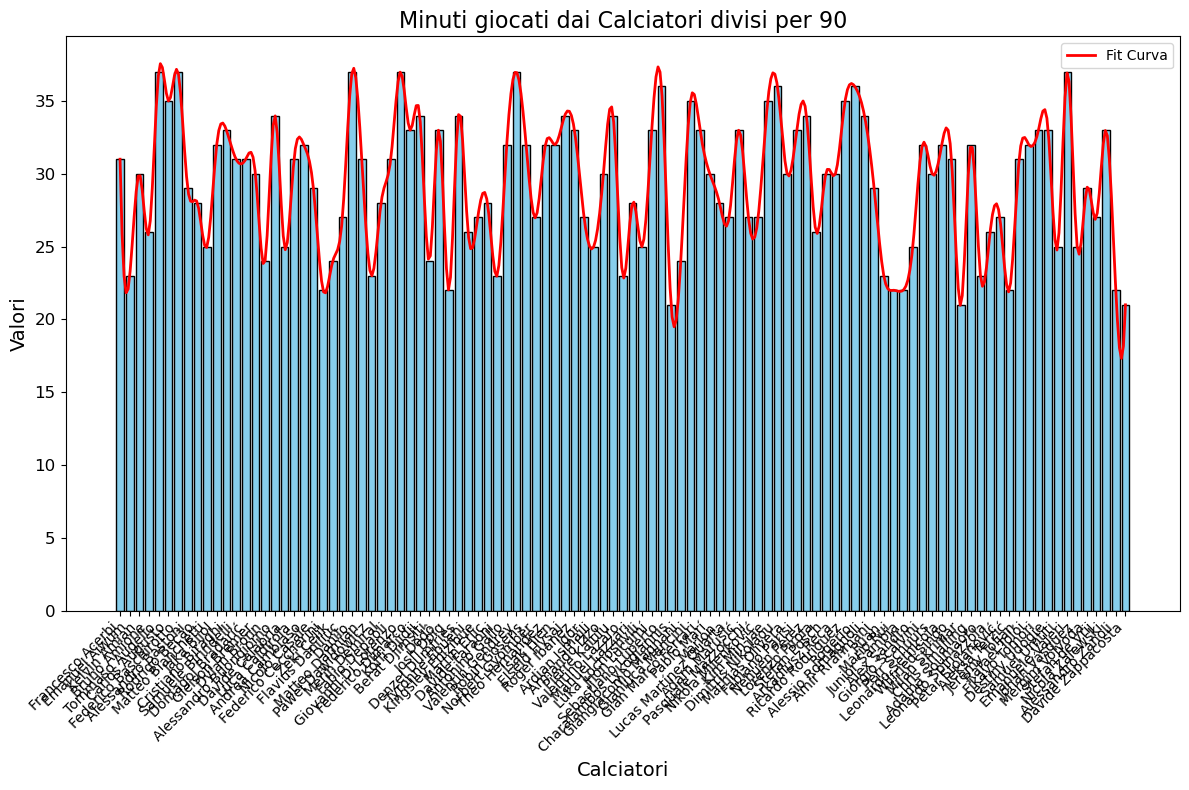

La media risulta: 29.39047619047619


In [4]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Estrai i dati rilevanti 
calciatori = data['Player'] 
valori = data['MP']  

#Considero calciatori con più di 20 apparizioni
filtrato = valori > 20
calciatori_filtrati = calciatori[filtrato]
valori_filtrati = valori[filtrato]

# Crea un istogramma
plt.figure(figsize=(12, 8))
plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

# Ottimizza il layout
plt.xlabel('Calciatori', fontsize=14)
plt.ylabel('Valori', fontsize=14)
plt.title('Minuti giocati dai Calciatori divisi per 90', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Aggiungi una curva di fit
x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

plt.tight_layout()
plt.legend()
plt.show()

media_valori_filtrati = valori_filtrati.mean()

# Mostra il risultato
print("La media risulta:", media_valori_filtrati)

In [5]:
import numpy as np

def calculate_bins(data):
    n = len(data)
    sigma = np.std(data)
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    
    # Regola di Freedman-Diaconis
    bin_width_fd = 2 * IQR / (n ** (1/3))
    num_bin_fd = int(np.ceil((data.max() - data.min()) / bin_width_fd))
    
    return num_bin_fd

In [6]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_histogram(data, label, xlabel, ylabel, title):
    # Filtra i valori non finiti (inf, -inf) e rimuovi NaN
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Calcola il numero di bin
    num_bins = calculate_bins(data)
    
    # Crea un istogramma dei dati
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(data, bins=num_bins, alpha=0.7, color='blue', edgecolor='black', label=label)
    
    # Funzione di fit (Gaussiana)
    def gauss(x, a, x0, sigma):
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
    
    # Calcola il centro dei bins per il fit
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Parametri iniziali per il fit gaussiano
    p0 = [max(counts), data.mean(), data.std()]
    
    # Fit dei dati con la funzione gaussiana
    try:
        popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=2000)
        print("Parametri ottimali del fit:", popt)  # Stampa i parametri ottimali del fit
        # Sovrapposizione del fit sull'istogramma solo se il fit ha successo
        x_fit = np.linspace(bins[0], bins[-1], 100)
        y_fit = gauss(x_fit, *popt)
        plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
    except RuntimeError as e:
        print(f"Errore durante il fitting: {e}")
    
    # Personalizzazione del grafico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Mostra il grafico
    plt.show()
    
    # Calcola e mostra la media dei dati
    media_valori = data.mean()
    print(f"La media risulta: {media_valori}")

In [7]:
def calcola_tackle(data):
    rapporti = data['TklW'] / data['Tkl']
    plot_histogram(rapporti, 'Tackles', 'Tackles riusciti', 'Numero di calciatori', 'Istogramma dei Tackles riusciti')

def calcola_intercettazioni(data):
    intercettazioni = data['Blocks']
    plot_histogram(intercettazioni, 'Intercettazioni', 'Intercettazioni', 'Numero di calciatori', 'Istogramma delle intercettazioni')

def calcola_passaggi(data):
    rapporti = (data['short Cmp%'] + data['medium Cmp%'] + data['long Cmp%']) / 3
    plot_histogram(rapporti, 'Precisione passaggi', 'Passaggi riusciti %', 'Numero di calciatori', 'Istogramma dei passaggi riusciti')

def calcola_gol(data):
    gol = data['Gls']
    plot_histogram(gol, 'Gol', 'Gol', 'Numero di calciatori', 'Istogramma dei gol')

def calcola_assist(data):
    presenze = data['MP']
    ast = data['Ast']
    # Filtra i dati dove 'MP' è maggiore o uguale a 5
    filtrati = data[presenze >= 5]
    ast = filtrati['Ast']
    plot_histogram(ast, 'Assist', 'Assist', 'Numero di calciatori', 'Istogramma degli assist')

def calcola_cartellini(data):
    cart = data['CrdY'] + data['CrdR']
    plot_histogram(cart, 'Cartellini', 'Cartellini', 'Numero di calciatori', 'Istogramma dei cartellini')

def calcola_key_passes(data):
    presenze = data['MP']
    kp = data['KP']
    # Filtra i dati dove 'MP' è maggiore o uguale a 5
    filtrati = data[presenze >= 5]
    kp = filtrati['KP']
    plot_histogram(kp, 'Key passes', 'Key passes', 'Numero di calciatori', 'Istogramma dei Key passes')

def calcola_duelli_aerei(data):
    Aerw = data['AerWon']
    Aertot = data['AerTot']
    # Calcola il rapporto per ogni calciatore
    rapporti = Aerw / Aertot
    plot_histogram(rapporti, 'Duelli aerei vinti', 'Duelli aerei vinti', 'Numero di calciatori', 'Istogramma dei duelli aerei vinti')

Parametri ottimali del fit: [34.69485919  0.59894796  0.10769396]


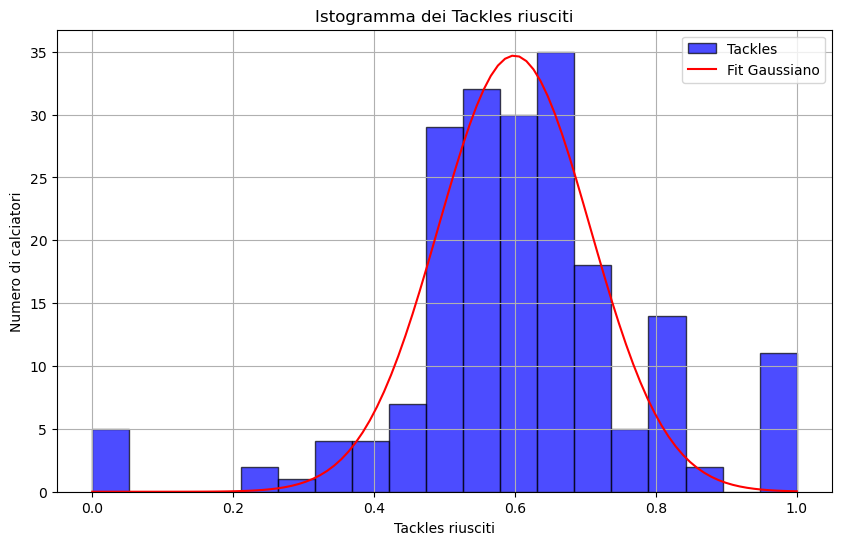

La media risulta: 0.606107023085355
Parametri ottimali del fit: [92462.91556521  -445.32390985   116.89189021]


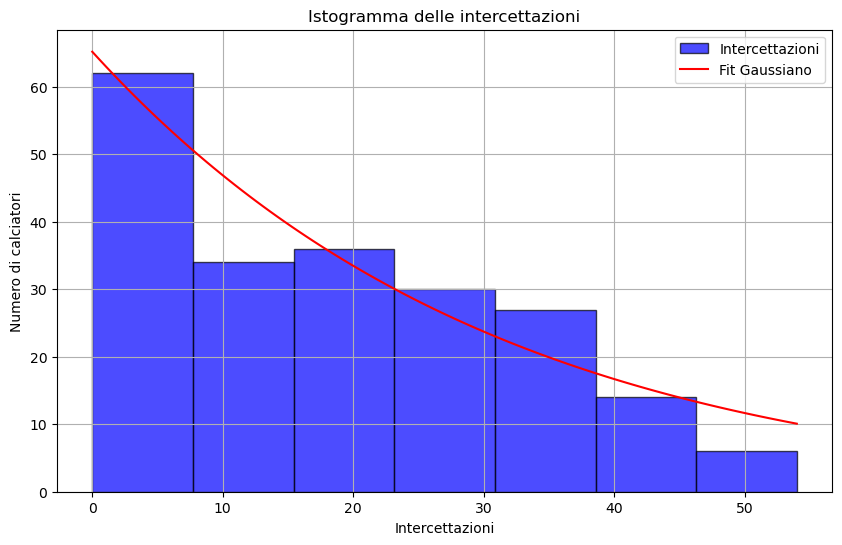

La media risulta: 18.641148325358852
Parametri ottimali del fit: [37.95288588 77.23652249  7.54282222]


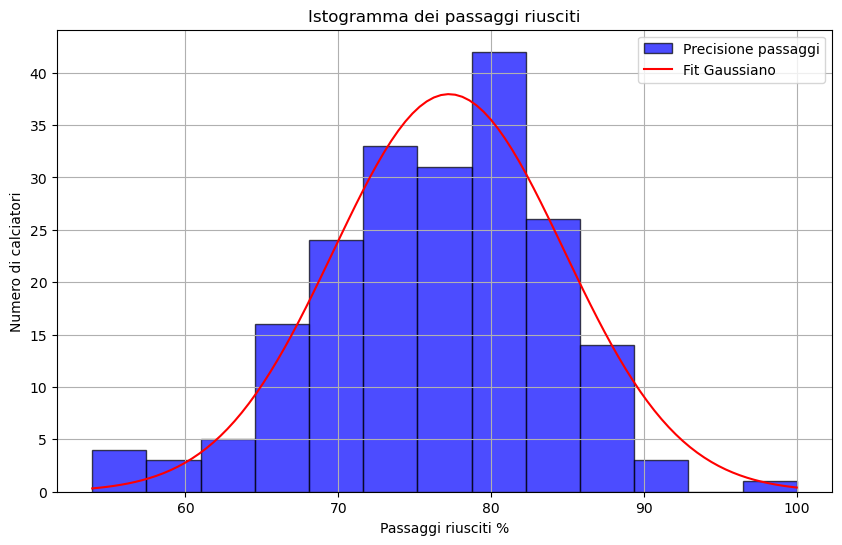

La media risulta: 76.3135313531353
Parametri ottimali del fit: [3.47414373e+02 2.77225826e-02 9.67951631e-02]


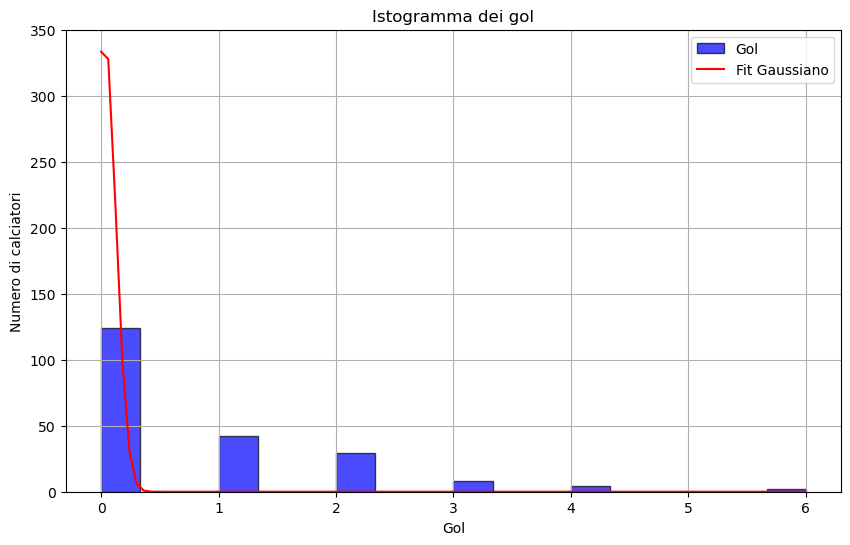

La media risulta: 0.7272727272727273
Parametri ottimali del fit: [4.28809521e+02 3.02550929e-03 1.42252808e-01]


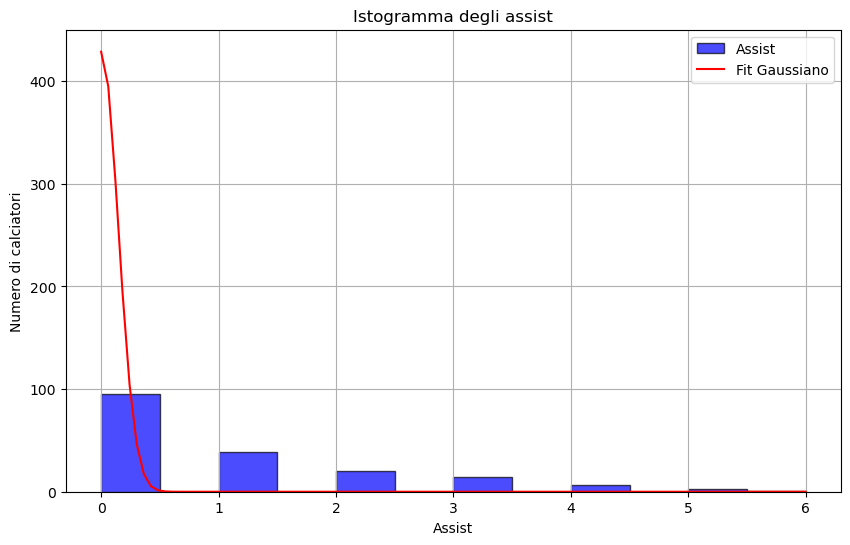

La media risulta: 0.9497206703910615
Parametri ottimali del fit: [139.13868957  -9.14434595   7.89266868]


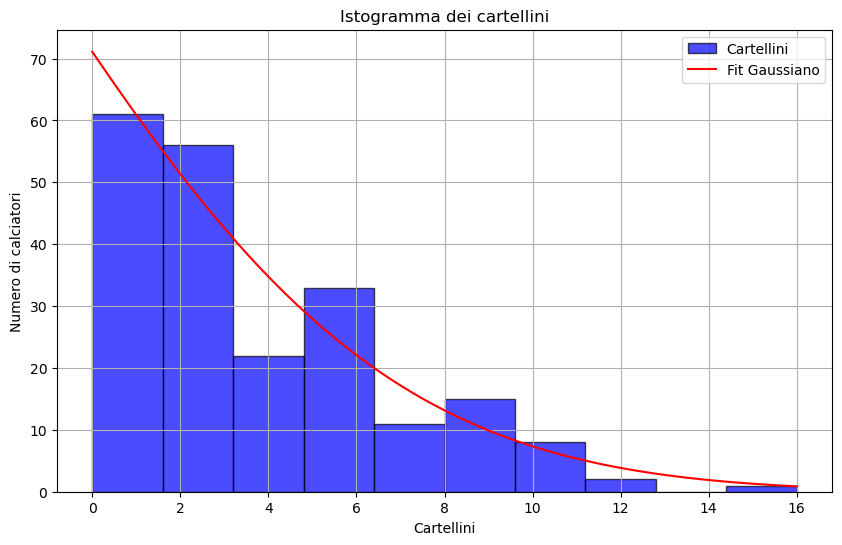

La media risulta: 3.645933014354067
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


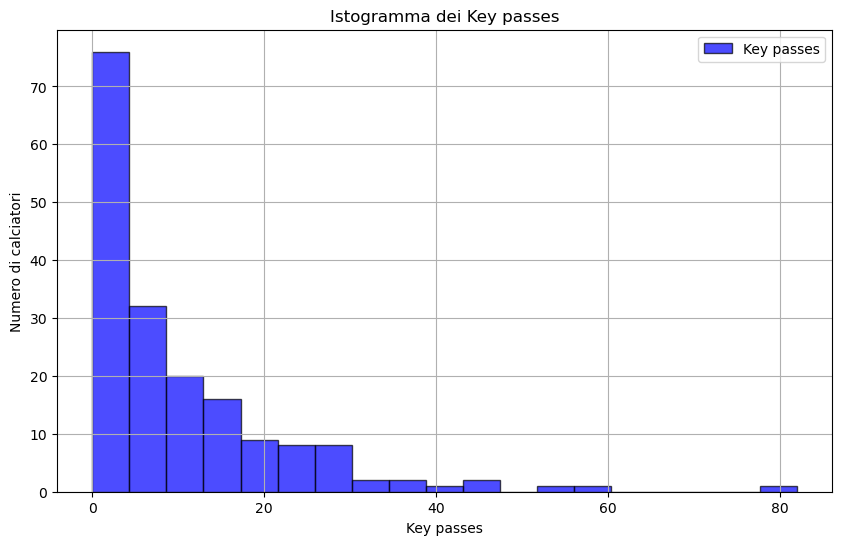

La media risulta: 10.363128491620111
Parametri ottimali del fit: [34.67127314  0.56572947  0.12299   ]


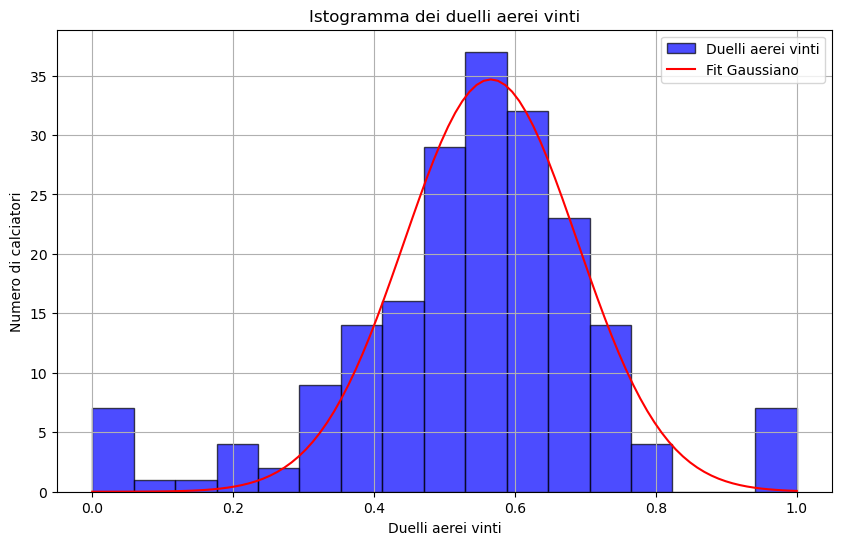

La media risulta: 0.5394684578660446


In [9]:
import pandas as pd

# Carica i dati
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx")

# Calcola e visualizza i grafici
calcola_tackle(data)
calcola_intercettazioni(data)
calcola_passaggi(data)
calcola_gol(data)
calcola_assist(data)
calcola_cartellini(data)
calcola_key_passes(data)
calcola_duelli_aerei(data)